In [1]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
from ase.io import read
from pyqstem.util import atoms_plot
from pyqstem import PyQSTEM
from ase.build import mx2
mpl.rc('font',**{'size' : 13})

We create an orthorhombic unit cell of MoS2. The unit cell is repeated 3x3 times, in order to accomodate the size of the probe at all scan positions. We set a scan range that covers the central unit cell.

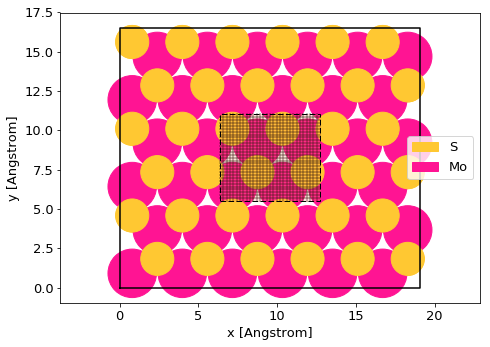

In [2]:
atoms=mx2(formula='MoS2', kind='2H', a=3.18, thickness=3.19, size=(2, 2, 1), vacuum=2)

cell=atoms.get_cell()
cell[1,0]=0
atoms.set_cell(cell)

atoms.wrap() # wrap atoms outside the unit cell
atoms.center() # center the atoms in the unit cell

atoms*=(3,3,1)

scan_range=[[cell[0,0],2*cell[0,0],30],
            [cell[1,1],2*cell[1,1],30]]

fig,ax=plt.subplots(figsize=(7,5))
atoms_plot(atoms,scan_range=scan_range,ax=ax,legend=True)

We create a QSTEM object in STEM mode and set the atomic object.

In [3]:
qstem = PyQSTEM('STEM')
qstem.set_atoms(atoms)

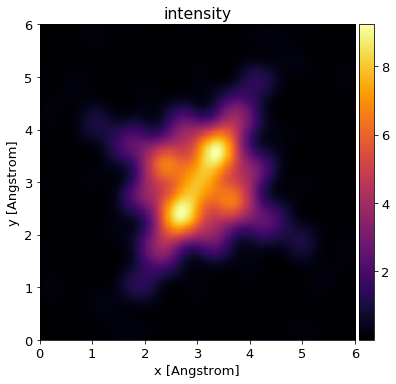

In [16]:
resolution = (0.02,0.02) # resolution in x and y-direction [Angstrom]
samples = (300,300) # samples in x and y-direction 
defocus = -10 # defocus [Angstrom]
v0 = 300 # acceleration voltage [keV]
alpha = 15 # convergence angle [mrad]
astigmatism = 50 # astigmatism magnitude [Angstrom]
astigmatism_angle = 30 # astigmatism angle [deg.]
aberrations = {'a33': 5000, 'phi33': 60} # higher order aberrations [Angstrom] or [deg.]

qstem.build_probe(v0,alpha,(300,300),resolution=(0.02,0.02),defocus=defocus,astig_mag=astigmatism,
                  astig_angle=astigmatism_angle,aberrations=aberrations)
wave=qstem.get_wave()
wave.view(cmap='inferno')

In [8]:
qstem.build_potential(1,scan_range=scan_range)
potential=qstem.get_potential_or_transfunc()

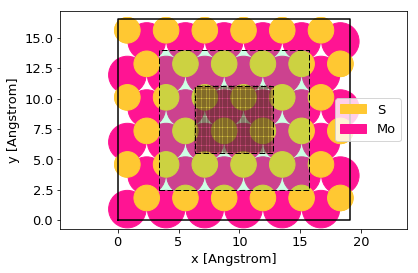

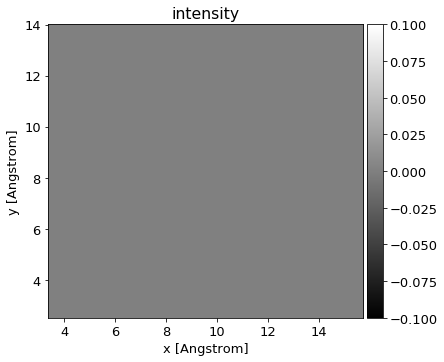

In [9]:

qstem.view()
potential.view()

In [10]:
qstem.add_detector('det1',(70,200))
qstem.run()

AttributeError: 'collections.OrderedDict' object has no attribute 'iteritems'

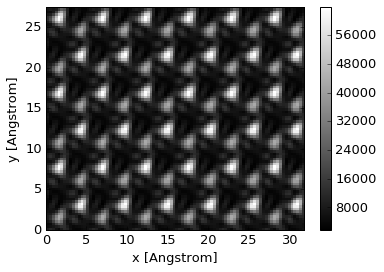

In [30]:
img=np.array(qstem.read_detector('det1'))
img=np.tile(img,(3,3))

extent=[0,scan_range[0][1]*3-scan_range[0][0],0,scan_range[1][1]*3-scan_range[1][0]]

plt.imshow(img.T,extent=extent,interpolation='nearest',cmap='gray')
plt.colorbar()
plt.xlabel('x [Angstrom]')
plt.ylabel('y [Angstrom]')
plt.show()